In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/raw/esg_scores.csv')

df.head()

,ticker,name,currency,exchange,industry,logo,weburl,environment_grade,environment_level,social_grade,...,governance_grade,governance_level,environment_score,social_score,governance_score,total_score,last_processing_date,total_grade,total_level,cik
0,dis,Walt Disney Co,USD,"NEW YORK STOCK EXCHANGE, INC.",Media,https://static.finnhub.io/logo/ef50b4a2b263c84...,https://thewaltdisneycompany.com/,A,High,BB,...,BB,Medium,510,316,321,1147,19-04-2022,BBB,High,1744489
1,gm,General Motors Co,USD,"NEW YORK STOCK EXCHANGE, INC.",Automobiles,https://static.finnhub.io/logo/9253db78-80c9-1...,https://www.gm.com/,A,High,BB,...,B,Medium,510,303,255,1068,17-04-2022,BBB,High,1467858
2,gww,WW Grainger Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Trading Companies and Distributors,https://static.finnhub.io/logo/f153dcda-80eb-1...,https://www.grainger.com/,B,Medium,BB,...,B,Medium,255,385,240,880,19-04-2022,BB,Medium,277135
3,mhk,Mohawk Industries Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Consumer products,https://static.finnhub.io/logo/26868a62-80ec-1...,https://mohawkind.com/,A,High,B,...,BB,Medium,570,298,303,1171,18-04-2022,BBB,High,851968
4,lyv,Live Nation Entertainment Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Media,https://static.finnhub.io/logo/1cd144d2-80ec-1...,https://www.livenationentertainment.com/,BBB,High,BB,...,B,Medium,492,310,250,1052,18-04-2022,BBB,High,1335258


In [3]:
print("Rows:", df.shape[0], "Columns:", df.shape[1])

print("\nColumns:\n", df.columns.tolist())

print("\nData Types:\n")
print(df.dtypes)

print("\nMissing Values\n")
print(df.isnull().sum())

Rows: 722 Columns: 21

Columns:
 ['ticker', 'name', 'currency', 'exchange', 'industry', 'logo', 'weburl', 'environment_grade', 'environment_level', 'social_grade', 'social_level', 'governance_grade', 'governance_level', 'environment_score', 'social_score', 'governance_score', 'total_score', 'last_processing_date', 'total_grade', 'total_level', 'cik']

Data Types:

ticker                  object
name                    object
currency                object
exchange                object
industry                object
logo                    object
weburl                  object
environment_grade       object
environment_level       object
social_grade            object
social_level            object
governance_grade        object
governance_level        object
environment_score        int64
social_score             int64
governance_score         int64
total_score              int64
last_processing_date    object
total_grade             object
total_level             object
cik          

In [4]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('/', '_')

In [5]:
print(df.columns.tolist())

['ticker', 'name', 'currency', 'exchange', 'industry', 'logo', 'weburl', 'environment_grade', 'environment_level', 'social_grade', 'social_level', 'governance_grade', 'governance_level', 'environment_score', 'social_score', 'governance_score', 'total_score', 'last_processing_date', 'total_grade', 'total_level', 'cik']


In [6]:
esg_columns = ['environment_score', 'social_score', 'governance_score', 'total_score']
df[esg_columns].describe()

,environment_score,social_score,governance_score,total_score
count,722.000000,722.000000,722.000000,722.000000
mean,404.806094,292.182825,278.761773,975.750693
std,145.103870,57.017406,47.031536,218.751796
min,200.000000,160.000000,75.000000,600.000000
25%,240.000000,243.000000,235.000000,763.000000
50%,483.000000,302.000000,300.000000,1046.000000
75%,518.750000,322.750000,310.000000,1144.000000
max,719.000000,667.000000,475.000000,1536.000000


In [7]:
df.to_csv('../data/processed/esg_scores_cleaned.csv', index=False)

In [8]:
plt.figure(figsize=(8, 4))

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Axes: xlabel='total_score', ylabel='Count'>

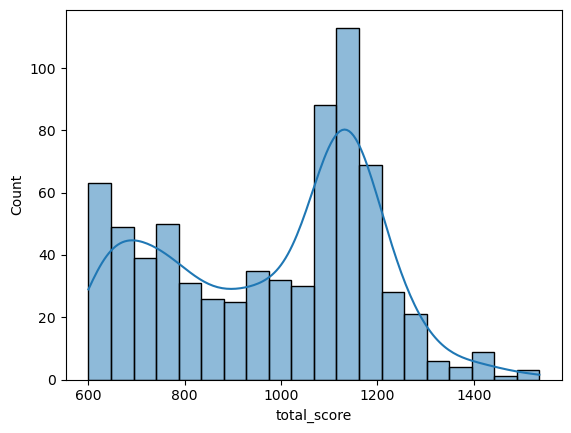

In [9]:
sns.histplot(df['total_score'], bins=20, kde=True)

Text(0.5, 1.0, 'Distribution of Total Scores')

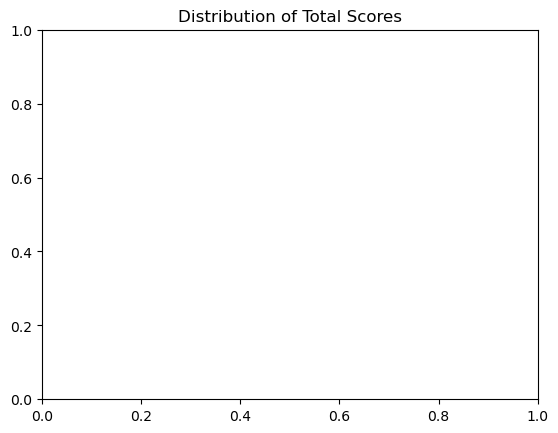

In [10]:
plt.title('Distribution of Total Scores')

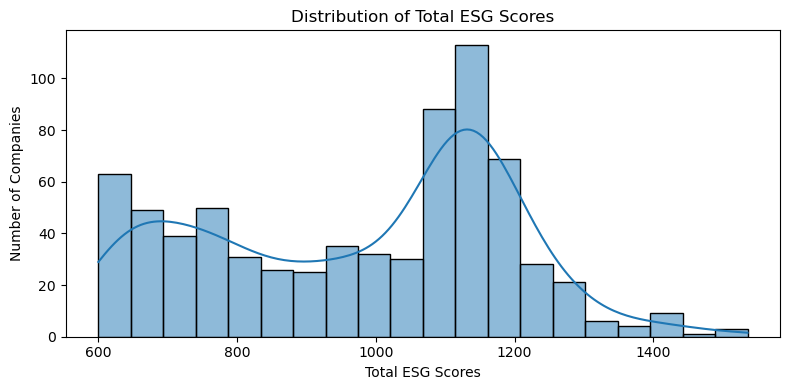

In [11]:
plt.figure(figsize=(8, 4))

sns.histplot(df['total_score'], bins=20, kde=True)

plt.title('Distribution of Total ESG Scores')
plt.xlabel('Total ESG Scores')
plt.ylabel('Number of Companies')
plt.tight_layout()
plt.savefig('../visuals/total_score_distributions.png', dpi=300)
plt.show()


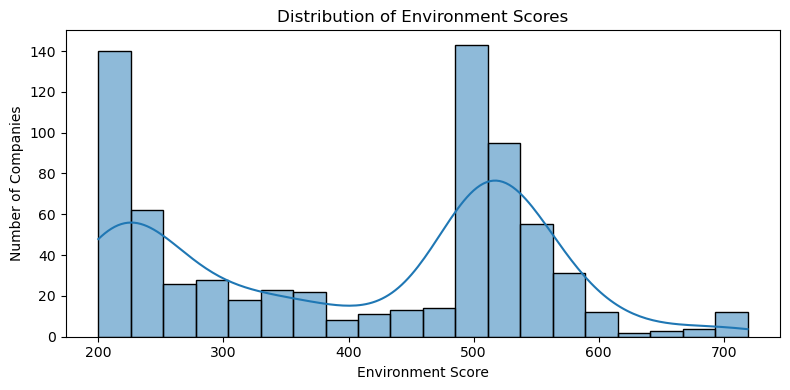

In [12]:
import os
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 4))

sns.histplot(df['environment_score'], bins=20, kde=True)

plt.title('Distribution of Environment Scores')
plt.xlabel('Environment Score')
plt.ylabel('Number of Companies')

plt.savefig('../visuals/enviroment_score_distribution.png', dpi=300)

plt.tight_layout()
plt.show()

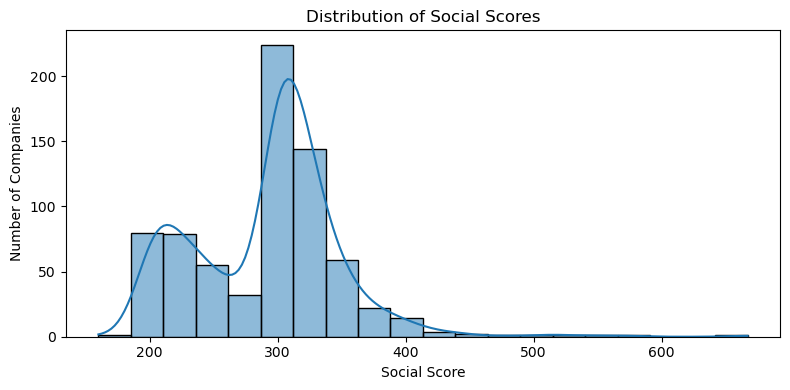

In [13]:
plt.figure(figsize=(8, 4))

sns.histplot(df['social_score'], bins=20, kde=True)

plt.title('Distribution of Social Scores')
plt.xlabel('Social Score')
plt.ylabel('Number of Companies')

plt.savefig('../visuals/social_score_distribution.png', dpi=300)

plt.tight_layout()
plt.show()

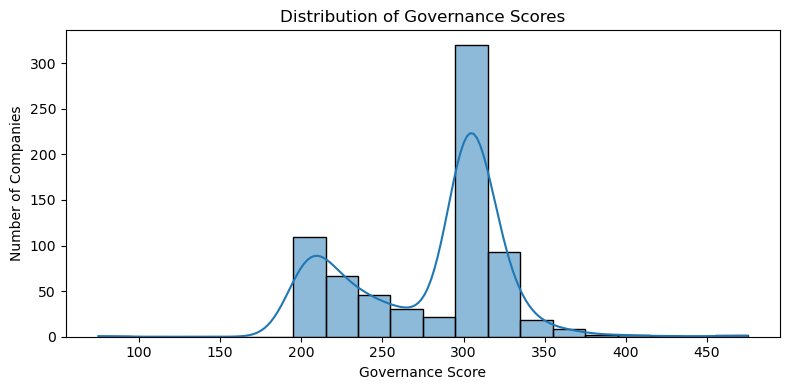

In [14]:
plt.figure(figsize=(8, 4))

sns.histplot(df['governance_score'], bins=20, kde=True)

plt.title('Distribution of Governance Scores')
plt.xlabel('Governance Score')
plt.ylabel('Number of Companies')

plt.savefig('../visuals/governance_score_distribution.png', dpi=300)

plt.tight_layout()
plt.show()

In [15]:
df['environment_grade'].value_counts()

environment_grade
A      321
B      255
BB      69
BBB     45
AA      32
Name: count, dtype: int64

In [16]:
df.groupby('environment_grade')['environment_score'].mean().sort_values(ascending=False)

environment_grade
AA     657.000000
A      524.183801
BBB    449.688889
BB     346.144928
B      230.835294
Name: environment_score, dtype: float64

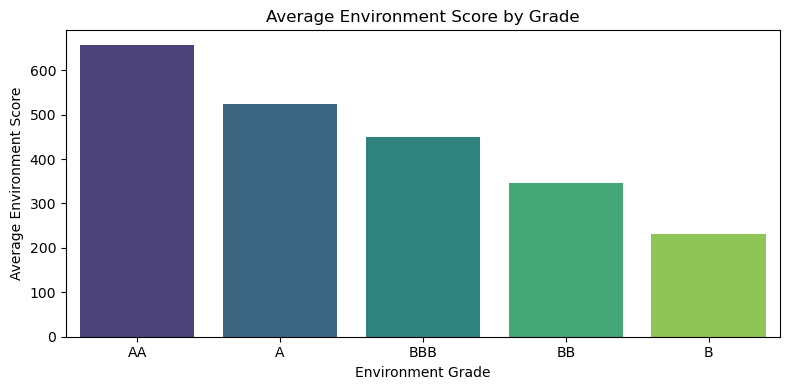

In [17]:
env_grade_means = df.groupby('environment_grade')['environment_score'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x=env_grade_means.index, y=env_grade_means.values, hue=env_grade_means.index, palette="viridis", legend=False)

plt.title('Average Environment Score by Grade')
plt.xlabel('Environment Grade')
plt.ylabel('Average Environment Score')

plt.savefig('../visuals/environment_grade_vs_score.png', dpi=300)
plt.tight_layout()
plt.show()

In [18]:
df['social_grade'].value_counts()

social_grade
BB     441
B      262
BBB     13
A        4
CCC      1
AA       1
Name: count, dtype: int64

In [19]:
df.groupby('social_grade')['social_score'].mean().sort_values(ascending=False)

social_grade
AA     667.000000
A      535.500000
BBB    422.923077
BB     320.768707
B      232.938931
CCC    160.000000
Name: social_score, dtype: float64

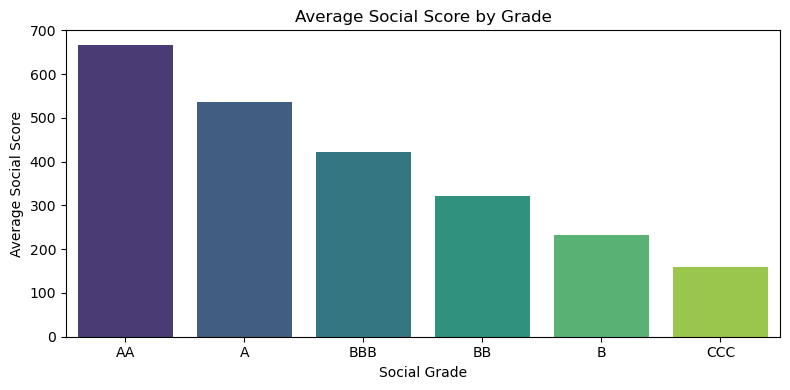

In [20]:
soc_grade_means = df.groupby('social_grade')['social_score'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x=soc_grade_means.index, y=soc_grade_means.values, hue=soc_grade_means.index, palette="viridis", legend=False)

plt.title('Average Social Score by Grade')
plt.xlabel('Social Grade')
plt.ylabel('Average Social Score')

plt.savefig('../visuals/social_grade_vs_score.png', dpi=300)

plt.tight_layout()
plt.show()

In [21]:
df['governance_grade'].value_counts()

governance_grade
BB     434
B      282
BBB      5
C        1
Name: count, dtype: int64

In [22]:
df.groupby('governance_grade')['governance_score'].mean().sort_values(ascending=False)

governance_grade
BBB    432.600000
BB     310.009217
B      228.666667
C       75.000000
Name: governance_score, dtype: float64

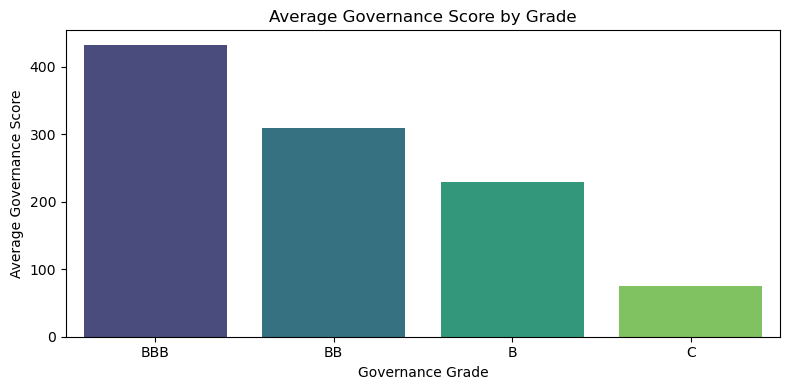

In [23]:
gov_grade_means = df.groupby('governance_grade')['governance_score'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x=gov_grade_means.index, y=gov_grade_means.values, hue=gov_grade_means.index, palette="viridis", legend=False)

plt.title('Average Governance Score by Grade')
plt.xlabel('Governance Grade')
plt.ylabel('Average Governance Score')

plt.savefig('../visuals/governance_grade_vs_score.png', dpi=300)
plt.tight_layout()
plt.show()

In [24]:
from sklearn.preprocessing import StandardScaler

esg_data = df[['environment_score', 'social_score', 'governance_score']]

scaler = StandardScaler()
esg_scaled = scaler.fit_transform(esg_data)

C:\Users\brett\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\brett\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\brett\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\brett\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

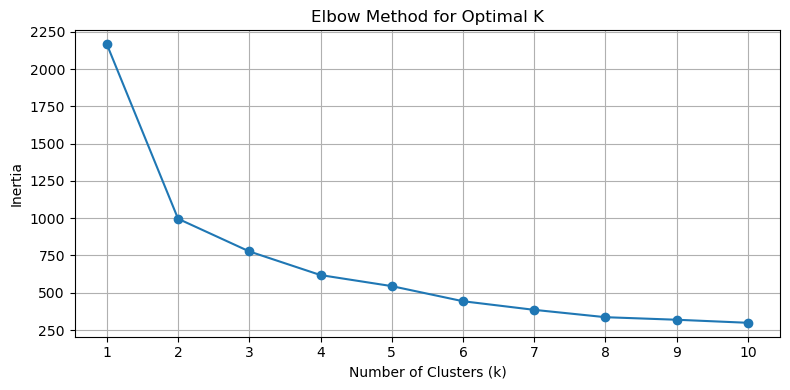

In [25]:
from sklearn.cluster import KMeans
import os
os.environ["OMP_NUM_THREADS"] = "3"

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(esg_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.tight_layout()
plt.savefig('../visuals/elbow_kmeans_esg.png', dpi=300)
plt.show()

In [26]:
kmeans_final = KMeans(n_clusters=3, random_state=42)
df['esg_cluster'] = kmeans_final.fit_predict(esg_scaled)

C:\Users\brett\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [27]:
df.groupby('esg_cluster')[['environment_score', 'social_score', 'governance_score']].mean()

,environment_score,social_score,governance_score
esg_cluster,,,
0,526.651715,325.984169,304.659631
1,275.112676,277.873239,299.105634
2,266.681592,238.557214,215.557214


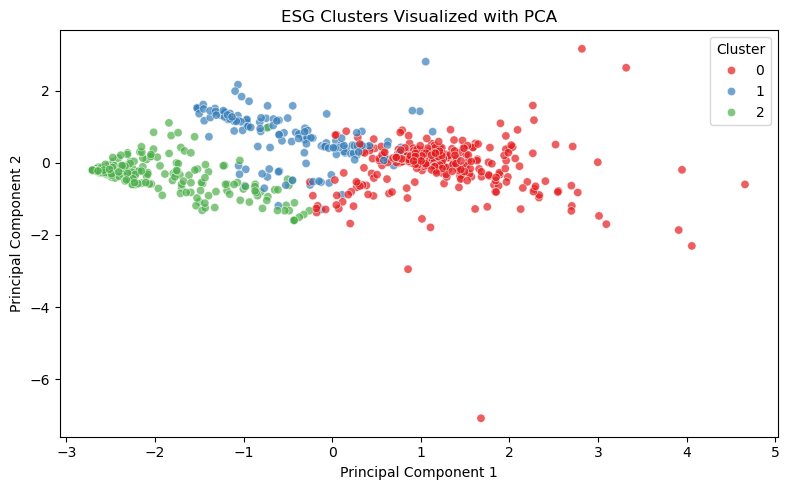

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
esg_pca = pca.fit_transform(esg_scaled)

df['pca1'] = esg_pca[:, 0]
df['pca2'] = esg_pca[:, 1]

plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df,
    x='pca1',
    y='pca2',
    hue='esg_cluster',
    palette='Set1',
    alpha=0.7
)

plt.title('ESG Clusters Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.savefig('../visuals/esg_cluster_pca_png', dpi=300)
plt.show()

In [29]:
env_grade_avg = df.groupby('environment_grade')['environment_score'].mean()

df['env_grade_avg'] = df['environment_grade'].map(env_grade_avg)

df['env_score_gap'] = df['environment_score'] - df['env_grade_avg']

In [30]:
df.sort_values('env_score_gap', ascending=False)[['name', 'environment_grade', 'environment_score', 'env_grade_avg', 'env_score_gap']].head(10)

,name,environment_grade,environment_score,env_grade_avg,env_score_gap
665,Pioneer Power Solutions Inc,B,299,230.835294,68.164706
301,DTE Energy Co,A,592,524.183801,67.816199
23,Allegiance Bancshares Inc,B,298,230.835294,67.164706
607,Matrix Service Co,A,589,524.183801,64.816199
47,Adagene Inc,B,295,230.835294,64.164706
384,Sherwin-Williams Co,B,295,230.835294,64.164706
469,Southwest Airlines Co,B,295,230.835294,64.164706
165,Alphabet Inc,B,295,230.835294,64.164706
518,Fox Corp,B,295,230.835294,64.164706
320,LyondellBasell Industries NV,A,587,524.183801,62.816199


In [31]:
df.sort_values('env_score_gap')[['name', 'environment_grade', 'environment_score', 'env_grade_avg', 'env_score_gap']].head(10)

,name,environment_grade,environment_score,env_grade_avg,env_score_gap
256,Alexandria Real Estate Equities Inc,AA,600,657.000000,-57.000000
295,Duke Energy Corp,AA,604,657.000000,-53.000000
151,Cognizant Technology Solutions Corp,AA,605,657.000000,-52.000000
509,Emerson Electric Co,AA,605,657.000000,-52.000000
425,Westinghouse Air Brake Technologies Corp,AA,607,657.000000,-50.000000
264,Becton Dickinson and Co,AA,607,657.000000,-50.000000
679,US Gold Corp,BBB,400,449.688889,-49.688889
406,Tyler Technologies Inc,BBB,400,449.688889,-49.688889
416,Valero Energy Corp,AA,608,657.000000,-49.000000
519,Freeport-McMoRan Inc,AA,608,657.000000,-49.000000


In [32]:
soc_grade_avg = df.groupby('social_grade')['social_score'].mean()

df['social_grade_avg'] = df['social_grade'].map(soc_grade_avg)
df['social_score_gap'] = df['social_score'] - df['social_grade_avg']

In [33]:
gov_grade_avg = df.groupby('governance_grade')['governance_score'].mean()

df['governance_grade_avg'] = df['governance_grade'].map(gov_grade_avg)
df['governance_score_gap'] = df['governance_score'] - df['governance_grade_avg']

In [34]:
discrepancy_df = df[[
    'name',
    'environment_grade', 'environment_score', 'env_score_gap',
    'social_grade', 'social_score', 'social_score_gap',
    'governance_grade', 'governance_score', 'governance_score_gap'
]].copy()

discrepancy_df['total_gap'] = (
    df['env_score_gap'] + df['social_score_gap'] + df['governance_score_gap']
)

discrepancy_df = discrepancy_df.sort_values('total_gap', ascending=False)

discrepancy_df.to_csv('../data/processed/esg_discrepancy_flags.csv', index=False)

In [72]:
most_overrated = discrepancy_df.sort_values('total_gap').head()
most_overrated[['name', 'environment_grade', 'social_grade', 'governance_grade', 'social_score', 'governance_score', 'total_gap']]


,name,environment_grade,social_grade,governance_grade,social_score,governance_score,total_gap
228,Zions Bancorporation NA,B,B,B,200,200,-92.440892
72,Allied Esports Entertainment Inc,B,B,B,200,200,-92.440892
704,Granite Construction Inc,B,B,B,200,200,-92.440892
595,XL Fleet Corp,B,B,B,200,200,-92.440892
395,TE Connectivity Ltd,B,B,B,200,200,-92.440892


In [74]:
most_overrated.to_csv('../data/processed_top_overrated_companies.csv', index=False)